In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

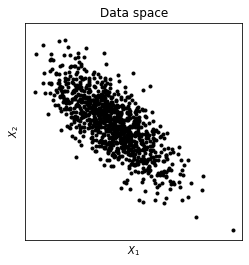

In [2]:
## Create the data

N = 1000

# data               x-axis               y-axis
x = np.array([ np.random.randn(N), .4*np.random.randn(N) ]).T

# rotation matrix
th = np.pi/4
R1 = [ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ]

# rotate data
y = x@np.array(R1)

axlim = [-1.1*max(abs(y.flatten())), 1.1*max(abs(y.flatten()))] # axis limits

# and plot
plt.plot(y[:,0],y[:,1],'k.')
plt.xticks([])
plt.yticks([])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('square')
plt.title('Data space')
plt.show()

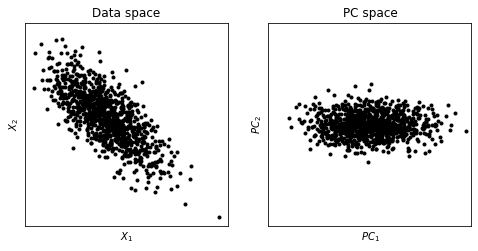

In [3]:
## now for PCA

# PCA using scikitlearn's function
pca = PCA().fit(y)

# get the PC scores
pcscores = pca.transform(y)


# and plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(y[:,0],y[:,1],'k.')
ax[0].axis('square')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_title('Data space')

ax[1].plot(pcscores[:,0],pcscores[:,1],'k.')
ax[1].axis('square')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[1].set_xlabel('$PC_1$')
ax[1].set_ylabel('$PC_2$')
ax[1].set_title('PC space')

plt.show()

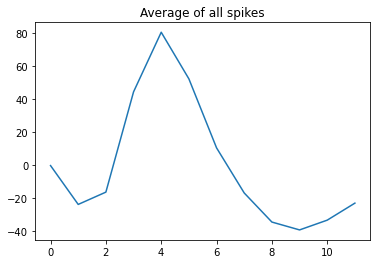

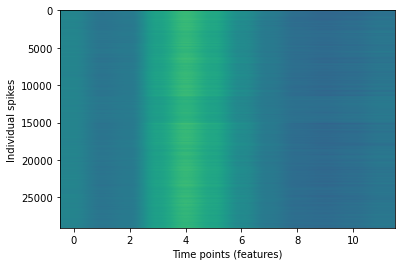

In [6]:
## for dimension reduction

spikes = np.loadtxt('spikes.csv', delimiter=',')


# let's see it!
plt.plot(np.mean(spikes,axis=0))
plt.title('Average of all spikes')
plt.show()

plt.imshow(spikes, aspect='auto')
plt.xlabel('Time points (features)')
plt.ylabel('Individual spikes')
plt.show()

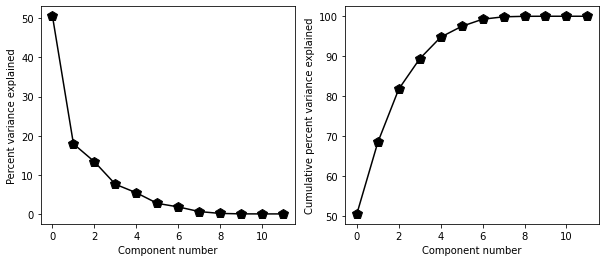

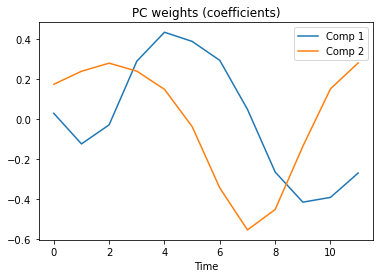

In [7]:
## pca

# PCA using scikitlearn's function
pca = PCA().fit(spikes)

# get the PC scores and the eigenspectrum
pcscores = pca.transform(spikes)
explVar = pca.explained_variance_
explVar = 100*explVar/sum(explVar) # convert to %total
coeffs  = pca.components_


# show the scree plot (a.k.a. eigenspectrum)
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(explVar,'kp-',markerfacecolor='k',markersize=10)
ax[0].set_xlabel('Component number')
ax[0].set_ylabel('Percent variance explained')

ax[1].plot(np.cumsum(explVar),'kp-',markerfacecolor='k',markersize=10)
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('Cumulative percent variance explained')
plt.show()

# now show the PC weights for the top two components
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.xlabel('Time')
plt.legend(('Comp 1','Comp 2'))
plt.title('PC weights (coefficients)')
plt.show()

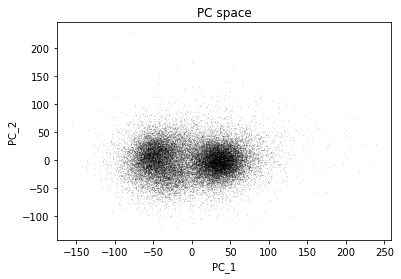

In [8]:
## finally, show the PC scores
plt.plot(pcscores[:,0], pcscores[:,1],'k.', markersize=.1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PC space')
plt.show()